In [1]:
import yfinance as yf
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "GOOG"
google_data = yf.download(stock, start, end)
google_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of google data')

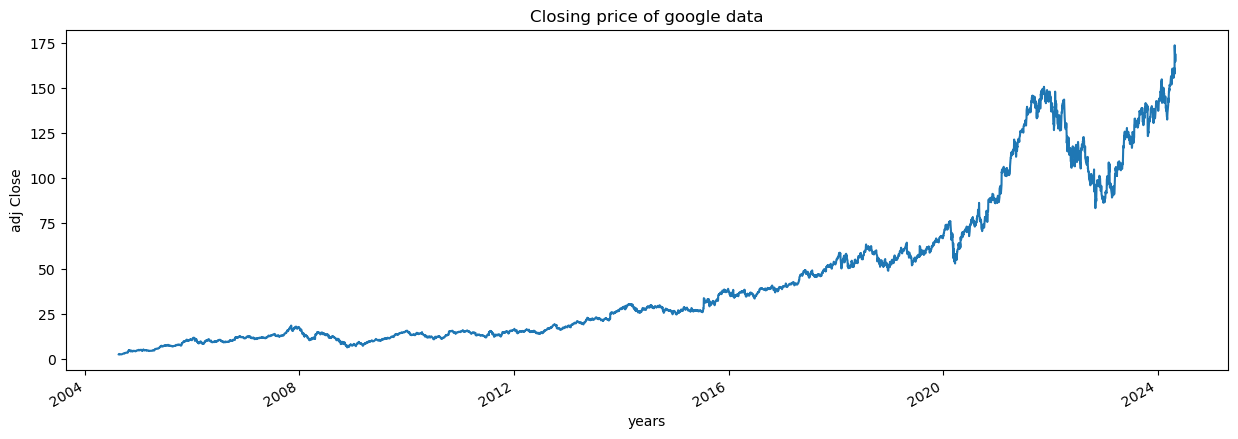

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data ")

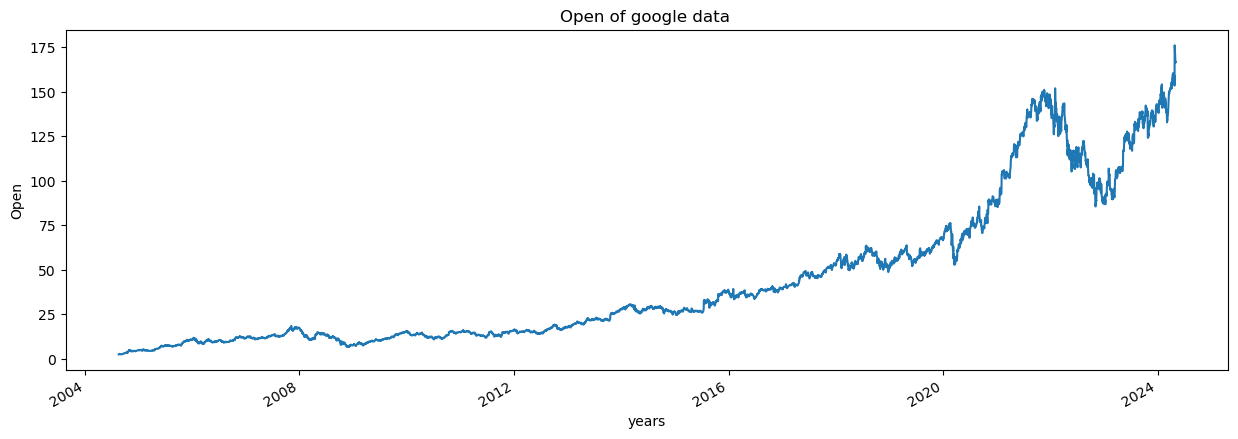

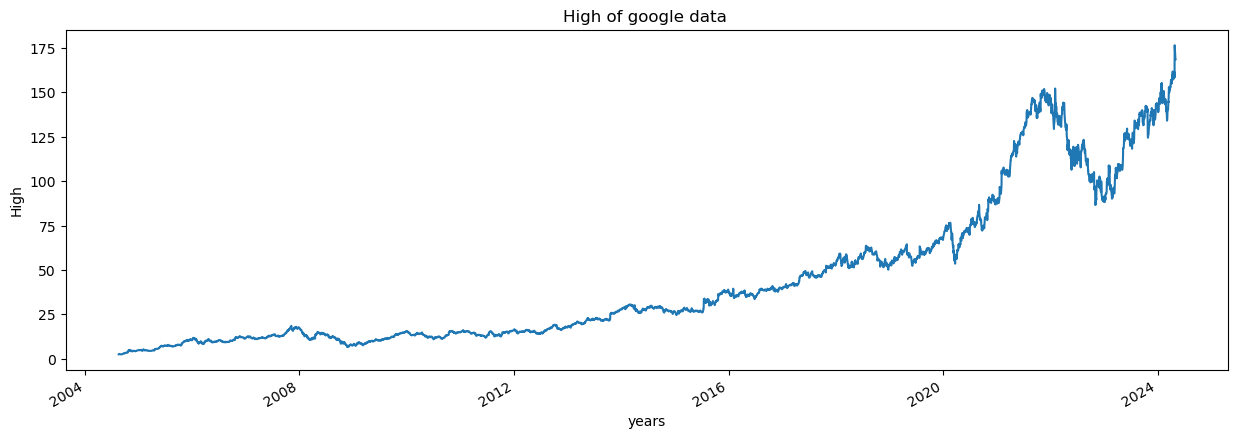

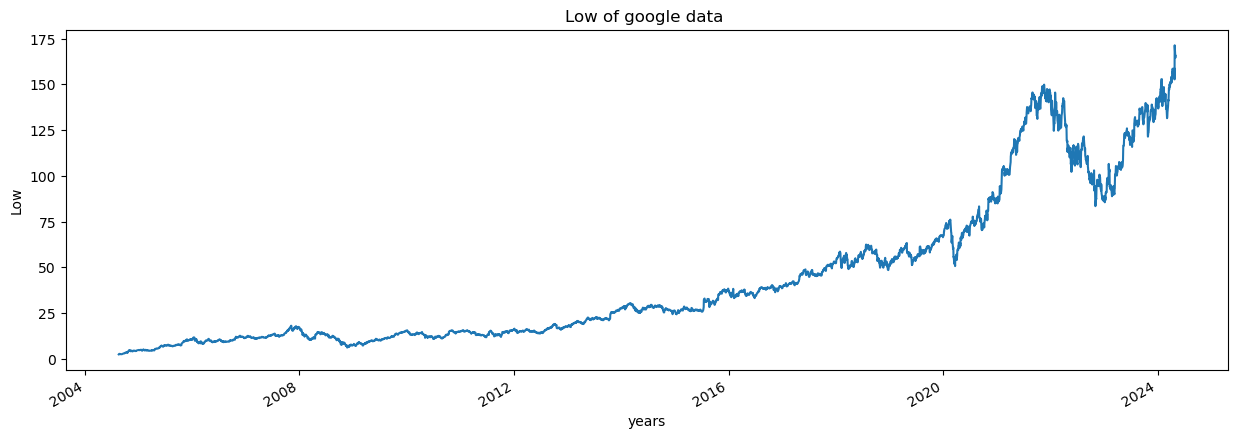

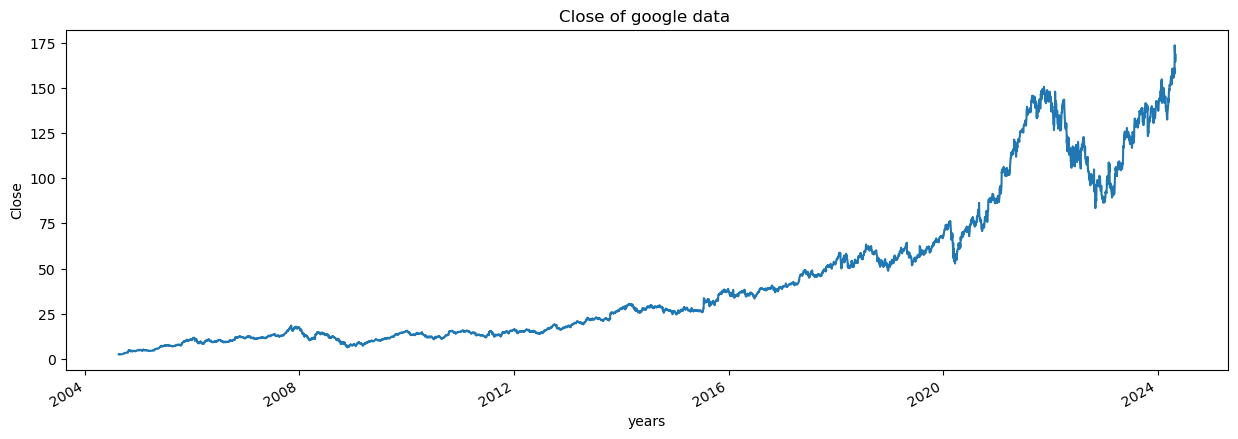

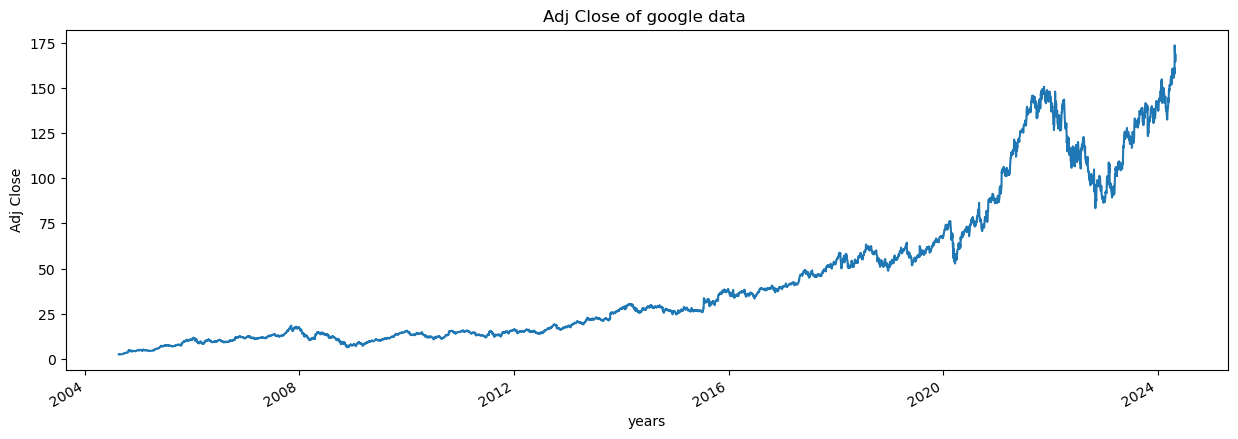

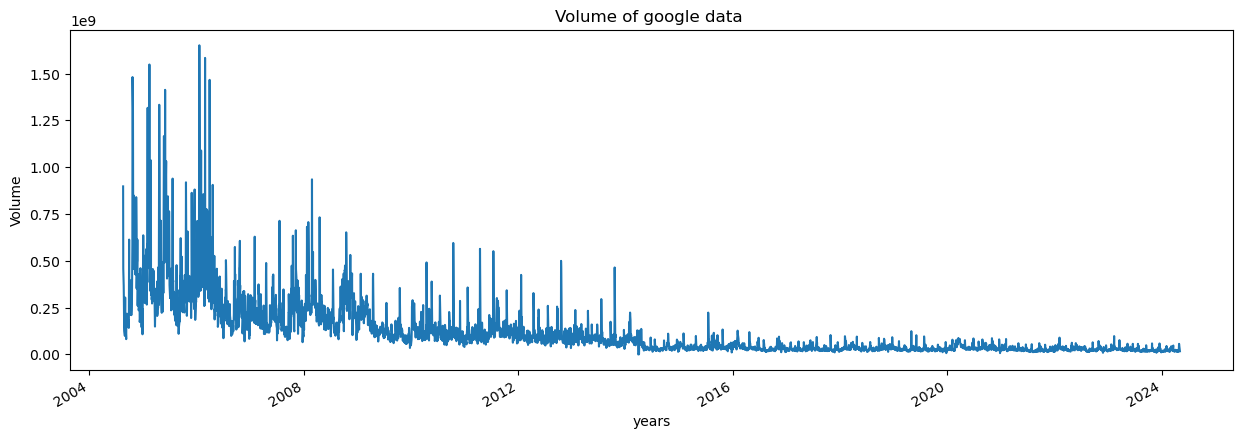

In [12]:
for column in google_data.columns:
    plot_graph((15, 5), google_data[column], column)

In [13]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [15]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data 

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range (2004, 2024):
    print(i, list(google_data.index.year).count(i))

94
252
251
251
253
252
252
252
250
252
252
252
252
251
251
252
253
252
251
250


In [21]:
google_data['MA_for_250'] = google_data['Adj Close'].rolling(250).mean()

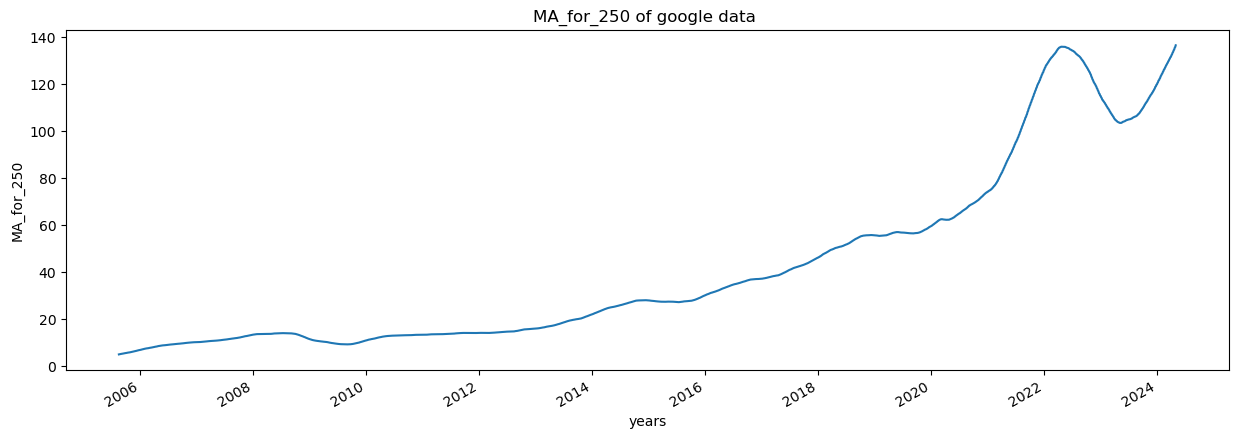

In [23]:
plot_graph((15, 5), google_data['MA_for_250'], 'MA_for_250')

<Figure size 640x480 with 0 Axes>

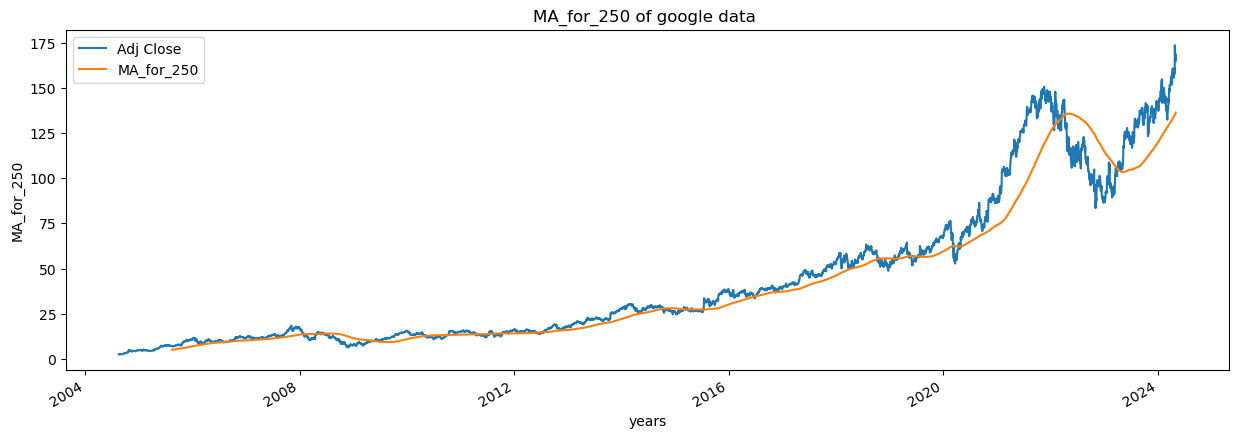

In [26]:
plot_graph((15, 5), google_data[['Adj Close','MA_for_250']], 'MA_for_250')

<Figure size 640x480 with 0 Axes>

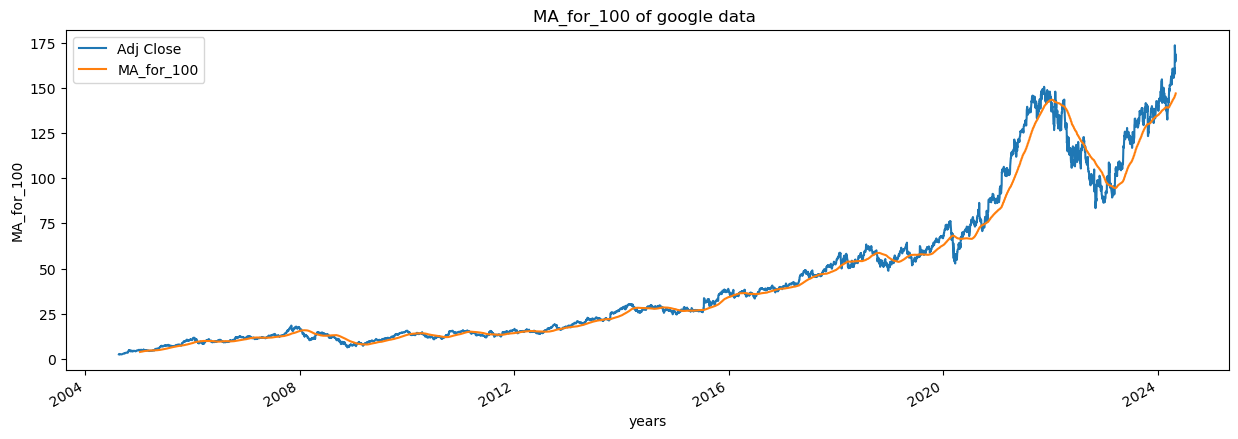

In [27]:
google_data['MA_for_100'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15, 5), google_data[['Adj Close','MA_for_100']], 'MA_for_100')

<Figure size 640x480 with 0 Axes>

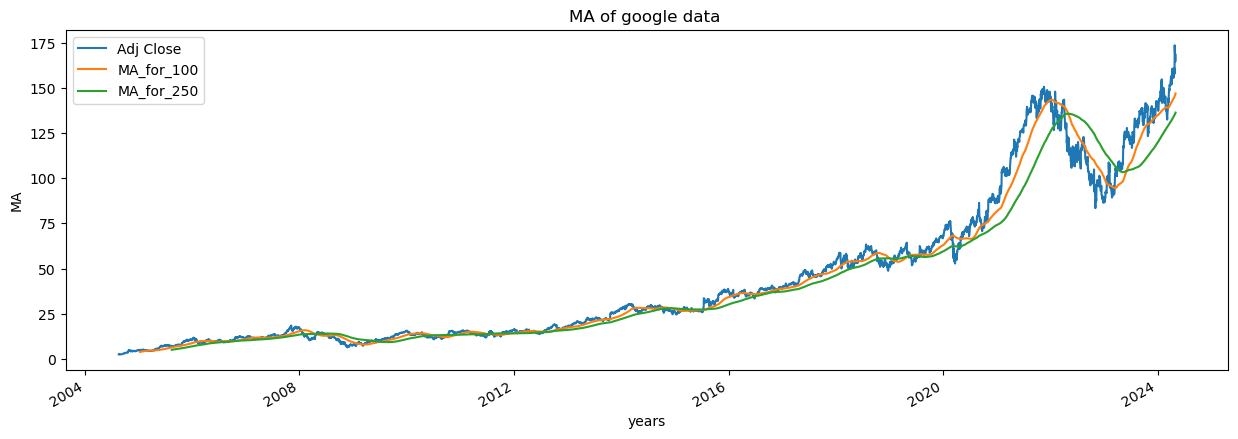

In [29]:
plot_graph((15, 5), google_data[['Adj Close','MA_for_100', 'MA_for_250']], 'MA')

In [31]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']]

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,0.079430
2004-08-23,2.724787,0.010064
2004-08-24,2.611960,-0.041408
2004-08-25,2.640104,0.010775
...,...,...
2024-04-26,173.690002,0.099652
2024-04-29,167.899994,-0.033335
2024-04-30,164.639999,-0.019416


<Figure size 640x480 with 0 Axes>

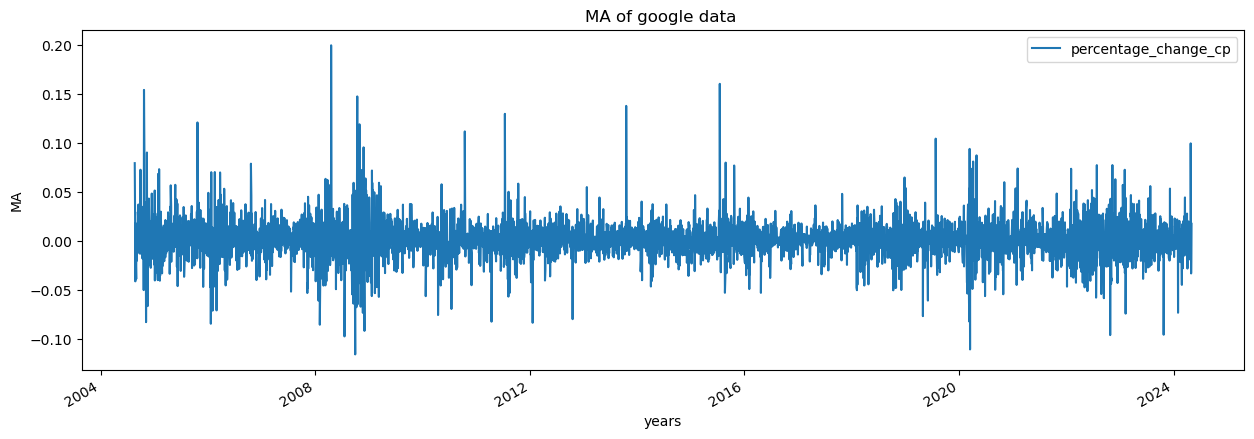

In [33]:
plot_graph((15, 5), google_data[["percentage_change_cp"]], 'MA')

In [34]:
Adj_close_price = google_data[['Adj Close']]

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)

In [38]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])


import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

x_data[0], y_data[0]

(array([[4.80154176e-05],
        [1.20751854e-03],
        [1.36609420e-03],
        [7.07054110e-04],
        [8.71448216e-04],
        [1.14932293e-03],
        [8.93270874e-04],
        [2.90971091e-04],
        [3.43344077e-04],
        [3.49190376e-05],
        [2.18226577e-04],
        [0.00000000e+00],
        [2.28412341e-04],
        [3.33162491e-04],
        [3.34616406e-04],
        [7.73975999e-04],
        [1.08967340e-03],
        [1.67015610e-03],
        [1.74435035e-03],
        [2.03095134e-03],
        [2.54305683e-03],
        [2.81510892e-03],
        [2.59397451e-03],
        [2.67253190e-03],
        [3.02751705e-03],
        [2.88348612e-03],
        [2.65507935e-03],
        [3.90623624e-03],
        [4.52017709e-03],
        [4.30485974e-03],
        [4.73840228e-03],
        [5.09919752e-03],
        [5.58074851e-03],
        [5.39307783e-03],
        [5.65057962e-03],
        [5.48764082e-03],
        [5.12829811e-03],
        [5.43963237e-03],
        [5.9

In [39]:
len(x_data)*0.7

3402.0

In [40]:
4908 - 100 - len(x_data)*0.7

1406.0

In [41]:
splitting_len = int(len(x_data) * 0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

In [43]:
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [44]:
print(x_train.shape)

(3402, 100, 1)


In [49]:

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [53]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [58]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

In [59]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [63]:
predictions = model.predict(x_test)
predictions

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


array([[0.2822608 ],
       [0.28293955],
       [0.2836188 ],
       ...,
       [0.6153297 ],
       [0.61752653],
       [0.61974525]], dtype=float32)

In [64]:
inv_prec = scaler.inverse_transform(predictions)
inv_prec

array([[ 50.813705],
       [ 50.929905],
       [ 51.046192],
       ...,
       [107.83479 ],
       [108.21089 ],
       [108.59074 ]], dtype=float32)

In [69]:

inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.79399872],
       [ 59.34799957],
       [ 59.24549866],
       ...,
       [164.63999939],
       [165.57000732],
       [168.46000671]])

In [67]:
rmse = np.sqrt(np.mean( (inv_prec - inv_y_test) ** 2))
rmse

28.398569423975424

In [70]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data' : inv_y_test.reshape(-1),
        'Predictions': inv_prec.reshape(-1)
    },
    index = google_data.index[splitting_len + 100 : ]
)

plotting_data.head()

,Original_test_data,Predictions
Date,,
2018-07-18,59.793999,50.813705
2018-07-19,59.348000,50.929905
2018-07-20,59.245499,51.046192
2018-07-23,60.275002,51.158218
2018-07-24,62.403999,51.276188


<Figure size 640x480 with 0 Axes>

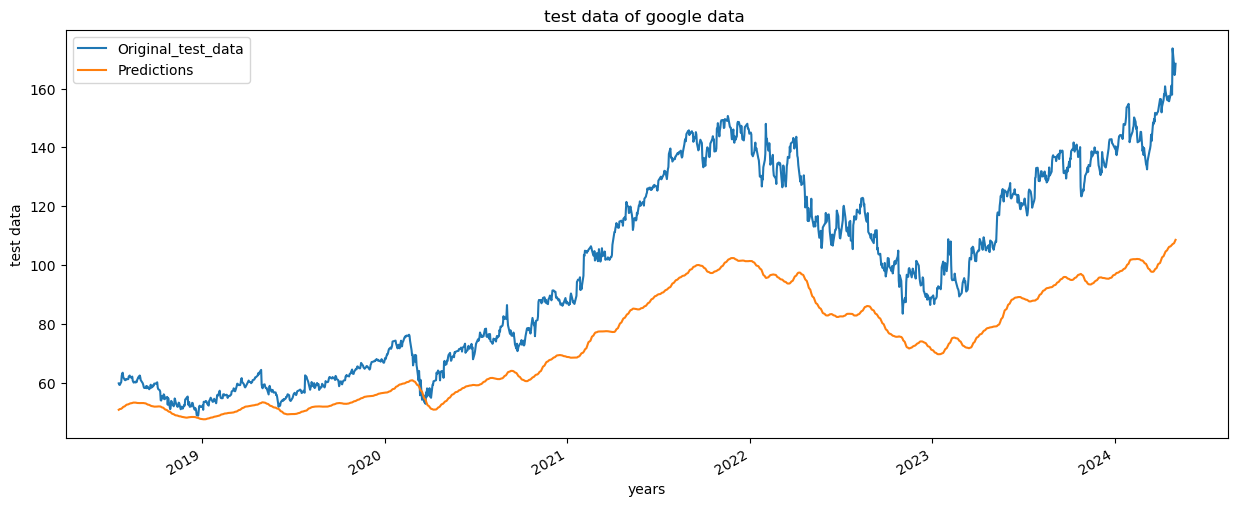

In [72]:
plot_graph((15, 6,), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

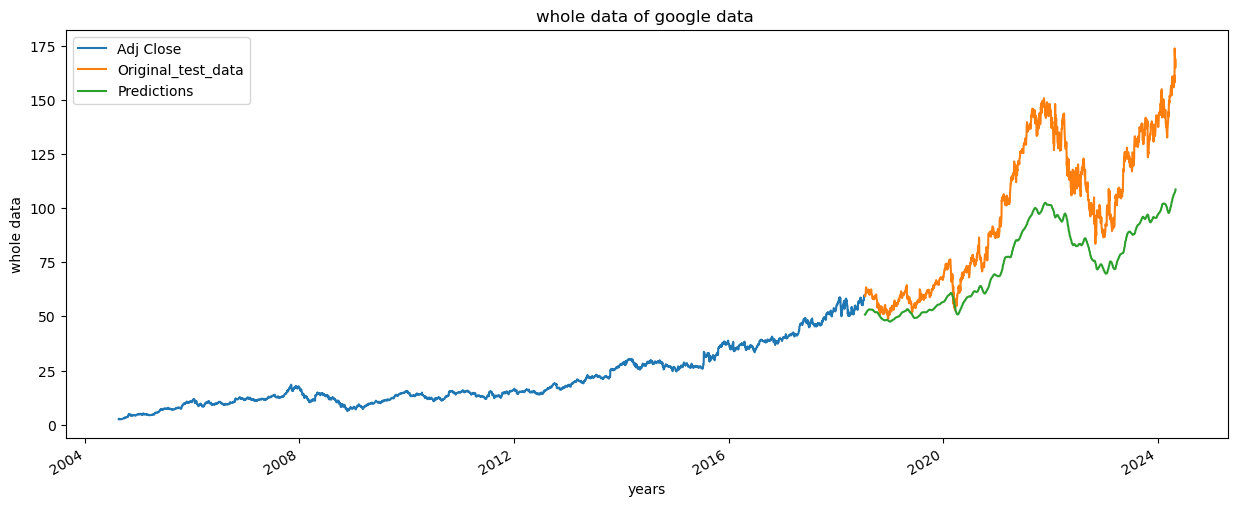

In [73]:
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len + 100], plotting_data], axis = 0), 'whole data')

In [74]:
model.save("Latest_stock_price_model.keras")